## **Breast Cancer Diagnosis Classifier**
### *Predicting whether breast cancer is Malignant (M) or Benign (B) using Machine Learning*

**Dataset:** Wisconsin Breast Cancer Diagnostic Dataset (UCI ML Repository)

This notebook demonstrates:
- Data loading and exploration
- Exploratory Data Analysis (EDA) with visualizations
- Feature preprocessing and selection
- Model building (KNN, Logistic Regression, Naive Bayes)
- Model evaluation and comparison
- Cross-validation for robust performance estimation

### 1. Importing Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


### 2. Loading the Dataset

In [2]:
# Install and import UCI ML repository package
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# Fetch Breast Cancer Wisconsin (Diagnostic) dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Extract features and targets
features = breast_cancer_wisconsin_diagnostic.data.features
targets = breast_cancer_wisconsin_diagnostic.data.targets

# Convert to pandas DataFrames
X = pd.DataFrame(features)
y = pd.DataFrame(targets)

print(f"Dataset loaded successfully!")
print(f"Features shape: {X.shape}")
print(f"Targets shape: {y.shape}")

Dataset loaded successfully!
Features shape: (569, 30)
Targets shape: (569, 1)


### 3. Initial Data Exploration

In [3]:
# Display first few rows
print("First 10 rows of features:")
print(X.head(10))
print("\n" + "="*80 + "\n")
print("First 10 rows of target:")
print(y.head(10))

First 10 rows of features:
   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   
5    12.45     15.70       82.57   477.1      0.12780       0.17000   
6    18.25     19.98      119.60  1040.0      0.09463       0.10900   
7    13.71     20.83       90.20   577.9      0.11890       0.16450   
8    13.00     21.82       87.50   519.8      0.12730       0.19320   
9    12.46     24.04       83.97   475.9      0.11860       0.23960   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0     0.30010          0.14710     0.2419             0.07871  ...    25.38   
1     0.08690          0.07017   

In [4]:
# Check dataset info
print("Dataset Information:")
print(f"Total samples: {len(X)}")
print(f"Total features: {X.shape[1]}")
print(f"\nFeature names:")
print(X.columns.tolist())
print(f"\nTarget distribution:")
print(y['Diagnosis'].value_counts())

Dataset Information:
Total samples: 569
Total features: 30

Feature names:
['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']

Target distribution:
Diagnosis
B    357
M    212
Name: count, dtype: int64


In [5]:
# Check for missing values
print("Missing values in features:")
print(X.isnull().sum())
print(f"\nTotal missing values: {X.isnull().sum().sum()}")
print(f"\nMissing values in target: {y.isnull().sum().sum()}")

Missing values in features:
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

Total missing values: 0

Missing values in target: 0


In [6]:
# Statistical summary
print("Statistical Summary of Features:")
X.describe()

Statistical Summary of Features:


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 4. Exploratory Data Analysis (EDA)

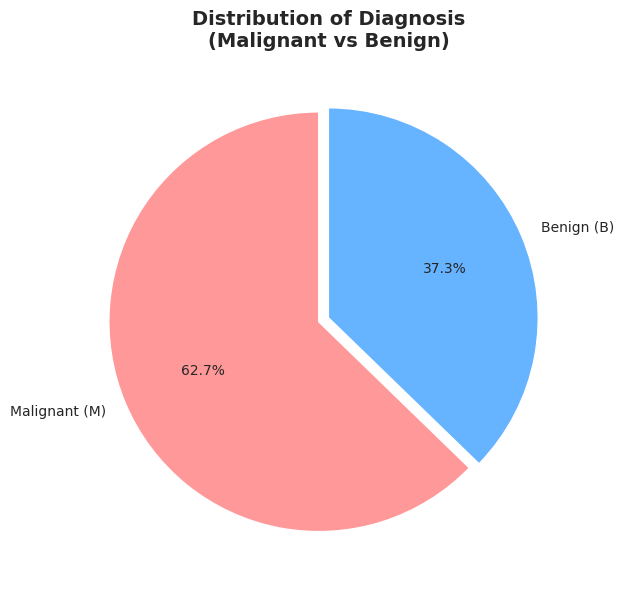

Malignant: 212 samples (37.3%)
Benign: 357 samples (62.7%)


In [7]:
# Visualize target distribution
plt.figure(figsize=(8, 6))
target_counts = y['Diagnosis'].value_counts()
colors = ['#ff9999', '#66b3ff']
plt.pie(target_counts, labels=['Malignant (M)', 'Benign (B)'], autopct='%1.1f%%',
        startangle=90, colors=colors, explode=(0.05, 0))
plt.title('Distribution of Diagnosis\n(Malignant vs Benign)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Malignant: {target_counts['M']} samples ({target_counts['M']/len(y)*100:.1f}%)")
print(f"Benign: {target_counts['B']} samples ({target_counts['B']/len(y)*100:.1f}%)")

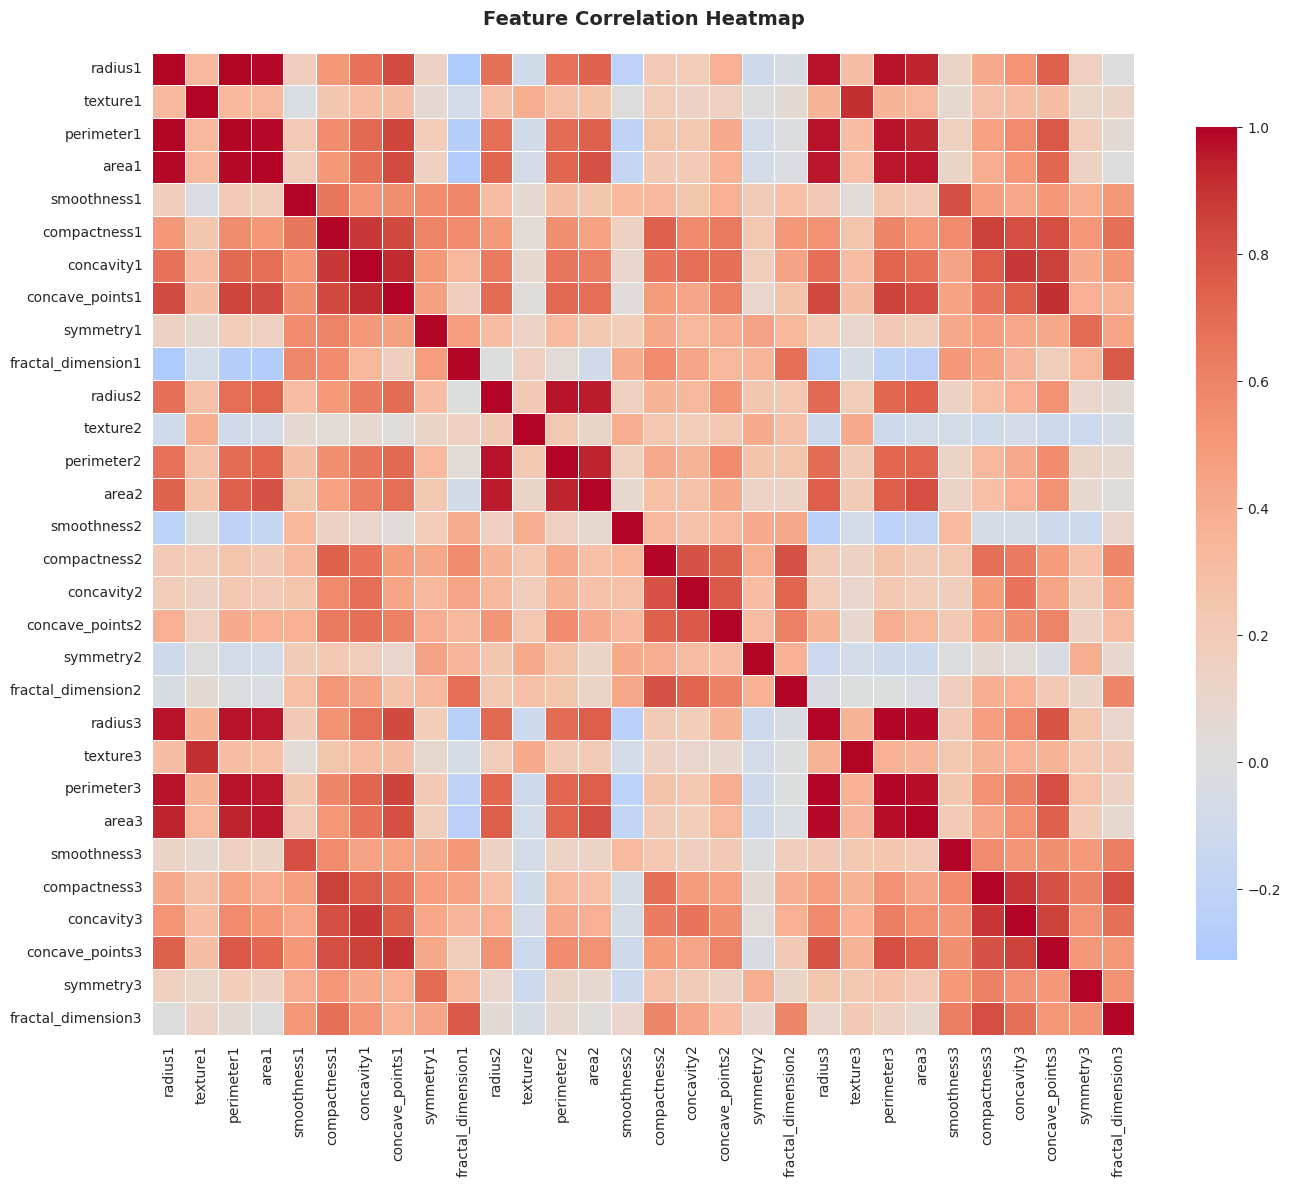


Highly correlated feature pairs (correlation > 0.9):
radius1 <-> perimeter1: 0.998
radius1 <-> area1: 0.987
radius1 <-> radius3: 0.970
radius1 <-> perimeter3: 0.965
radius1 <-> area3: 0.941
texture1 <-> texture3: 0.912
perimeter1 <-> area1: 0.987
perimeter1 <-> radius3: 0.969
perimeter1 <-> perimeter3: 0.970
perimeter1 <-> area3: 0.942


In [8]:
# Correlation heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nHighly correlated feature pairs (correlation > 0.9):")
high_corr = np.where(np.abs(correlation_matrix) > 0.9)
high_corr_list = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y])
                  for x, y in zip(*high_corr) if x != y and x < y]
for feat1, feat2, corr in high_corr_list[:10]:
    print(f"{feat1} <-> {feat2}: {corr:.3f}")

/tmp/ipython-input-1133554880.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Diagnosis', y=feature,
/tmp/ipython-input-1133554880.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Diagnosis', y=feature,
/tmp/ipython-input-1133554880.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Diagnosis', y=feature,
/tmp/ipython-input-1133554880.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` var

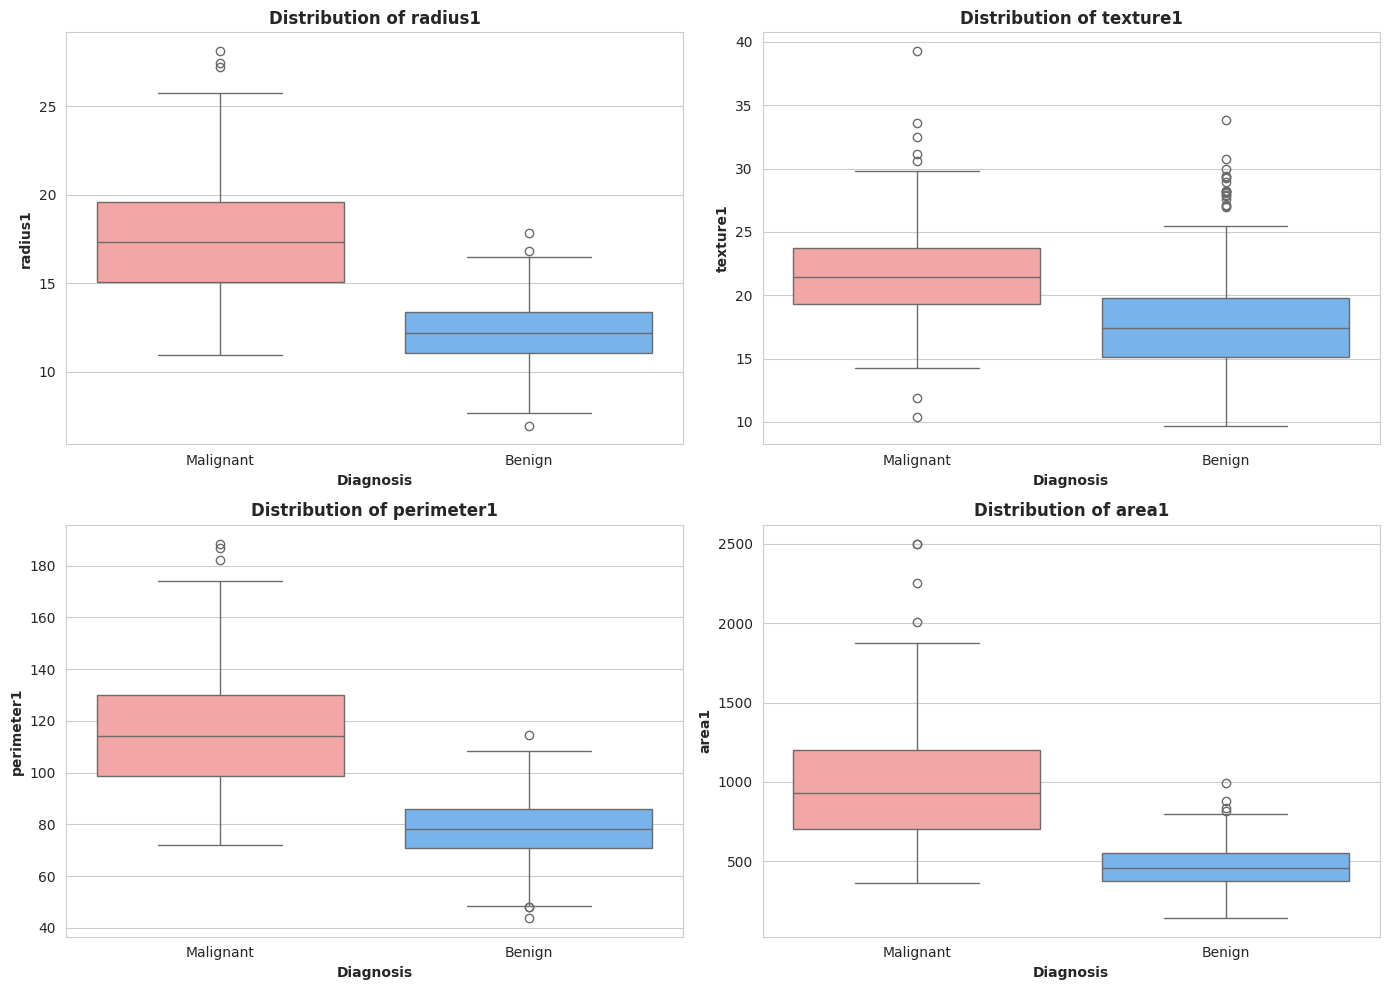

In [9]:
# Box plots for key features
key_features = X.columns[:4]  # First 4 features as examples
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

# Map diagnosis for visualization
y_mapped = y['Diagnosis'].map({'M': 'Malignant', 'B': 'Benign'})
combined_data = pd.concat([X, y_mapped], axis=1)

for idx, feature in enumerate(key_features):
    sns.boxplot(data=combined_data, x='Diagnosis', y=feature,
                palette=['#ff9999', '#66b3ff'], ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature}', fontweight='bold')
    axes[idx].set_xlabel('Diagnosis', fontweight='bold')
    axes[idx].set_ylabel(feature, fontweight='bold')

plt.tight_layout()
plt.show()

### 5. Data Preprocessing

In [10]:
# Map diagnosis labels: M (Malignant) = 1, B (Benign) = 0
diag_map = {'M': 1, 'B': 0}
y['Diagnosis'] = y['Diagnosis'].map(diag_map)

print("Diagnosis mapping applied:")
print("M (Malignant) → 1")
print("B (Benign) → 0")
print(f"\nUpdated target distribution:")
print(y['Diagnosis'].value_counts())

Diagnosis mapping applied:
M (Malignant) → 1
B (Benign) → 0

Updated target distribution:
Diagnosis
0    357
1    212
Name: count, dtype: int64


In [11]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTarget distribution in training set:")
print(y_train['Diagnosis'].value_counts())
print(f"\nTarget distribution in testing set:")
print(y_test['Diagnosis'].value_counts())

Training set size: 455 samples
Testing set size: 114 samples

Target distribution in training set:
Diagnosis
0    285
1    170
Name: count, dtype: int64

Target distribution in testing set:
Diagnosis
0    72
1    42
Name: count, dtype: int64


In [12]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"\nSample scaled features (first 5 rows, first 3 columns):")
print(X_train_scaled[:5, :3])

Feature scaling completed!

Sample scaled features (first 5 rows, first 3 columns):
[[ 0.51855873  0.89182579  0.4246317 ]
 [-0.51636409 -1.63971029 -0.54134872]
 [-0.36811839  0.45551496 -0.38824993]
 [ 0.20528479  0.72616767  0.40033031]
 [ 1.2430047   0.19419511  1.21037678]]


### 6. Model Training and Evaluation

#### 6.1 K-Nearest Neighbors (KNN)

In [13]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train.values.ravel())

# Make predictions
knn_y_pred = knn.predict(X_test_scaled)

# Evaluate model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"KNN Accuracy: {knn_accuracy:.4f} ({knn_accuracy*100:.2f}%)")
print(f"\nClassification Report:")
print(classification_report(y_test, knn_y_pred, target_names=['Benign', 'Malignant']))

KNN Accuracy: 0.9561 (95.61%)

Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      0.99      0.97        72
   Malignant       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



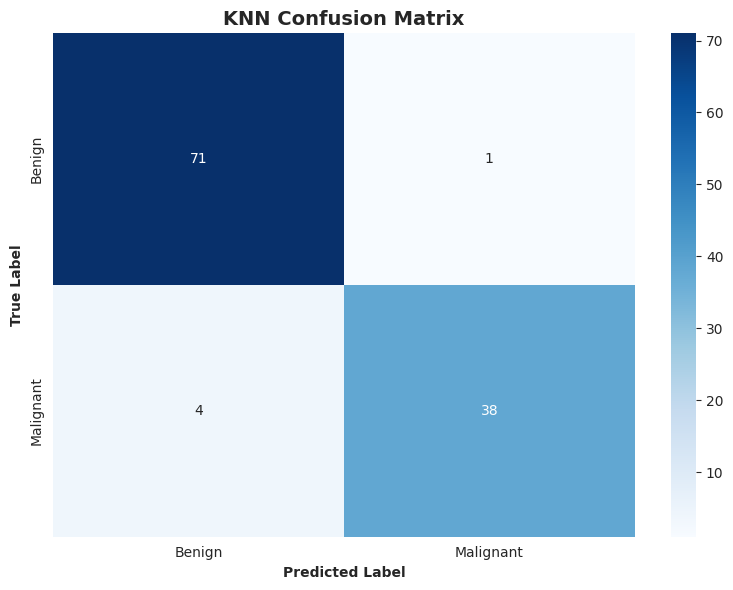

True Negatives: 71
False Positives: 1
False Negatives: 4
True Positives: 38


In [14]:
# KNN Confusion Matrix
cm_knn = confusion_matrix(y_test, knn_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('KNN Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.tight_layout()
plt.show()

print(f"True Negatives: {cm_knn[0,0]}")
print(f"False Positives: {cm_knn[0,1]}")
print(f"False Negatives: {cm_knn[1,0]}")
print(f"True Positives: {cm_knn[1,1]}")

#### 6.2 Logistic Regression

In [15]:
# Train Logistic Regression classifier
logreg = LogisticRegression(random_state=42, max_iter=10000)
logreg.fit(X_train_scaled, y_train.values.ravel())

# Make predictions
logreg_y_pred = logreg.predict(X_test_scaled)

# Evaluate model
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f} ({logreg_accuracy*100:.2f}%)")
print(f"\nClassification Report:")
print(classification_report(y_test, logreg_y_pred, target_names=['Benign', 'Malignant']))

Logistic Regression Accuracy: 0.9649 (96.49%)

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        72
   Malignant       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



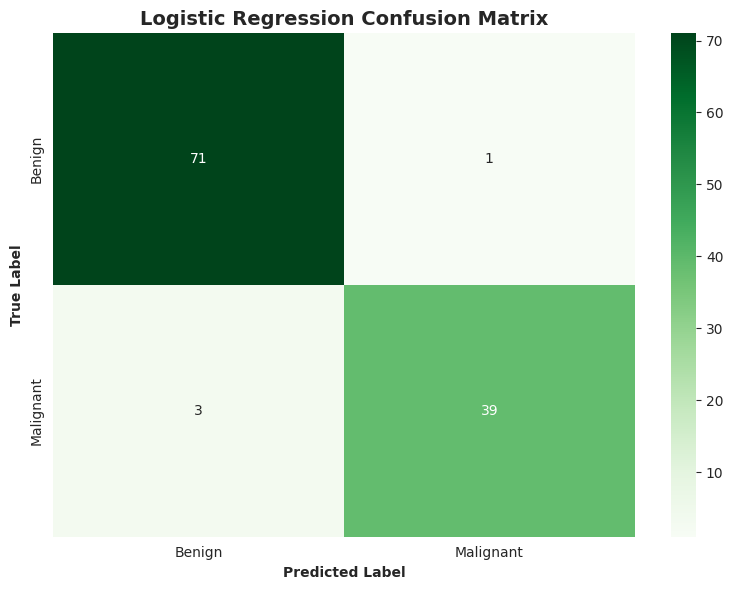

True Negatives: 71
False Positives: 1
False Negatives: 3
True Positives: 39


In [16]:
# Logistic Regression Confusion Matrix
cm_logreg = confusion_matrix(y_test, logreg_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Logistic Regression Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.tight_layout()
plt.show()

print(f"True Negatives: {cm_logreg[0,0]}")
print(f"False Positives: {cm_logreg[0,1]}")
print(f"False Negatives: {cm_logreg[1,0]}")
print(f"True Positives: {cm_logreg[1,1]}")

#### 6.3 Naive Bayes

In [17]:
# Train Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train.values.ravel())

# Make predictions
nb_y_pred = nb_model.predict(X_test_scaled)

# Evaluate model
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f} ({nb_accuracy*100:.2f}%)")
print(f"\nClassification Report:")
print(classification_report(y_test, nb_y_pred, target_names=['Benign', 'Malignant']))

Naive Bayes Accuracy: 0.9211 (92.11%)

Classification Report:
              precision    recall  f1-score   support

      Benign       0.92      0.96      0.94        72
   Malignant       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



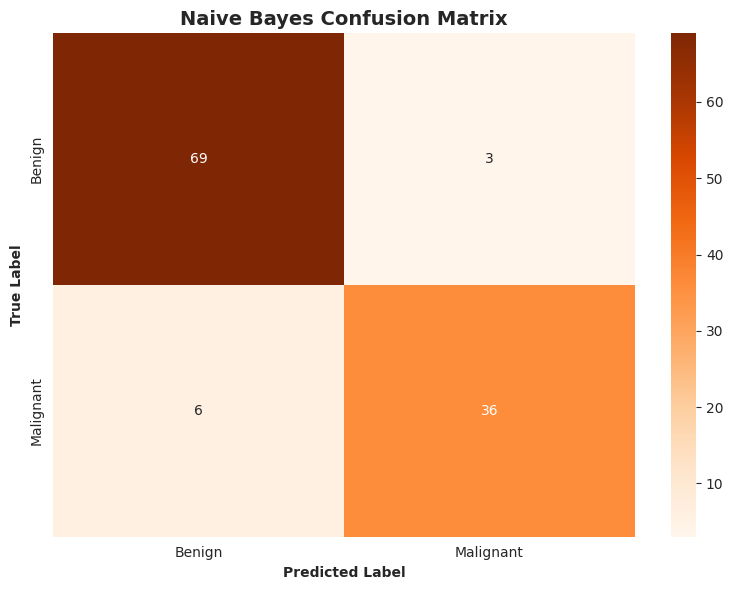

True Negatives: 69
False Positives: 3
False Negatives: 6
True Positives: 36


In [18]:
# Naive Bayes Confusion Matrix
cm_nb = confusion_matrix(y_test, nb_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Naive Bayes Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.tight_layout()
plt.show()

print(f"True Negatives: {cm_nb[0,0]}")
print(f"False Positives: {cm_nb[0,1]}")
print(f"False Negatives: {cm_nb[1,0]}")
print(f"True Positives: {cm_nb[1,1]}")

### 7. K-Fold Cross-Validation

In [19]:
# Perform 10-fold cross-validation for all models
cv_folds = 10

# KNN Cross-validation
knn_cv_scores = cross_val_score(knn, X_train_scaled, y_train.values.ravel(), cv=cv_folds)
knn_cv_mean = knn_cv_scores.mean()
knn_cv_std = knn_cv_scores.std()

# Logistic Regression Cross-validation
logreg_cv_scores = cross_val_score(logreg, X_train_scaled, y_train.values.ravel(), cv=cv_folds)
logreg_cv_mean = logreg_cv_scores.mean()
logreg_cv_std = logreg_cv_scores.std()

# Naive Bayes Cross-validation
nb_cv_scores = cross_val_score(nb_model, X_train_scaled, y_train.values.ravel(), cv=cv_folds)
nb_cv_mean = nb_cv_scores.mean()
nb_cv_std = nb_cv_scores.std()

print("Cross-Validation Results (10-Fold):")
print("="*60)
print(f"KNN - Mean Accuracy: {knn_cv_mean:.4f} (±{knn_cv_std:.4f})")
print(f"Logistic Regression - Mean Accuracy: {logreg_cv_mean:.4f} (±{logreg_cv_std:.4f})")
print(f"Naive Bayes - Mean Accuracy: {nb_cv_mean:.4f} (±{nb_cv_std:.4f})")

Cross-Validation Results (10-Fold):
KNN - Mean Accuracy: 0.9625 (±0.0312)
Logistic Regression - Mean Accuracy: 0.9715 (±0.0219)
Naive Bayes - Mean Accuracy: 0.9404 (±0.0386)


### 8. Model Comparison

In [20]:
# Create comparison dataframe
comparison_data = {
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes'],
    'Test Accuracy': [knn_accuracy, logreg_accuracy, nb_accuracy],
    'CV Mean Accuracy': [knn_cv_mean, logreg_cv_mean, nb_cv_mean],
    'CV Std Dev': [knn_cv_std, logreg_cv_std, nb_cv_std]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)

print("Model Performance Comparison:")
print("="*70)
print(comparison_df.to_string(index=False))
print("="*70)

# Identify best model
best_model_idx = comparison_df['Test Accuracy'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
best_accuracy = comparison_df.loc[best_model_idx, 'Test Accuracy']
print(f"\n🏆 Best Model: {best_model} with Test Accuracy: {best_accuracy:.4f}")

Model Performance Comparison:
              Model  Test Accuracy  CV Mean Accuracy  CV Std Dev
                KNN         0.9561            0.9625      0.0312
Logistic Regression         0.9649            0.9715      0.0219
        Naive Bayes         0.9211            0.9404      0.0386

🏆 Best Model: Logistic Regression with Test Accuracy: 0.9649


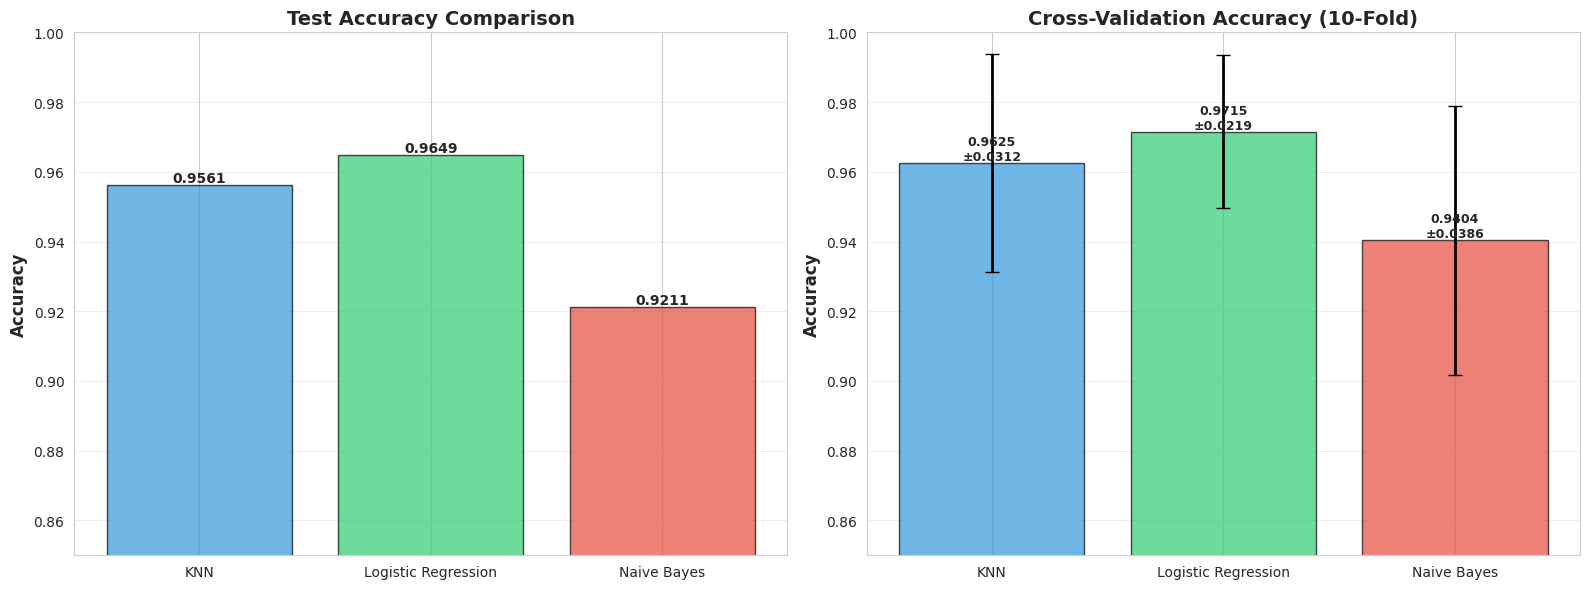

In [21]:
# Visualize model comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot for test accuracy
models = comparison_df['Model']
test_acc = comparison_df['Test Accuracy']
colors = ['#3498db', '#2ecc71', '#e74c3c']

bars = ax1.bar(models, test_acc, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Accuracy', fontweight='bold', fontsize=12)
ax1.set_title('Test Accuracy Comparison', fontweight='bold', fontsize=14)
ax1.set_ylim([0.85, 1.0])
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontweight='bold')

# Bar plot for cross-validation accuracy with error bars
cv_mean = comparison_df['CV Mean Accuracy']
cv_std = comparison_df['CV Std Dev']

bars2 = ax2.bar(models, cv_mean, yerr=cv_std, color=colors, alpha=0.7,
                edgecolor='black', capsize=5, error_kw={'linewidth': 2})
ax2.set_ylabel('Accuracy', fontweight='bold', fontsize=12)
ax2.set_title('Cross-Validation Accuracy (10-Fold)', fontweight='bold', fontsize=14)
ax2.set_ylim([0.85, 1.0])
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, mean, std in zip(bars2, cv_mean, cv_std):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{mean:.4f}\n±{std:.4f}',
             ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

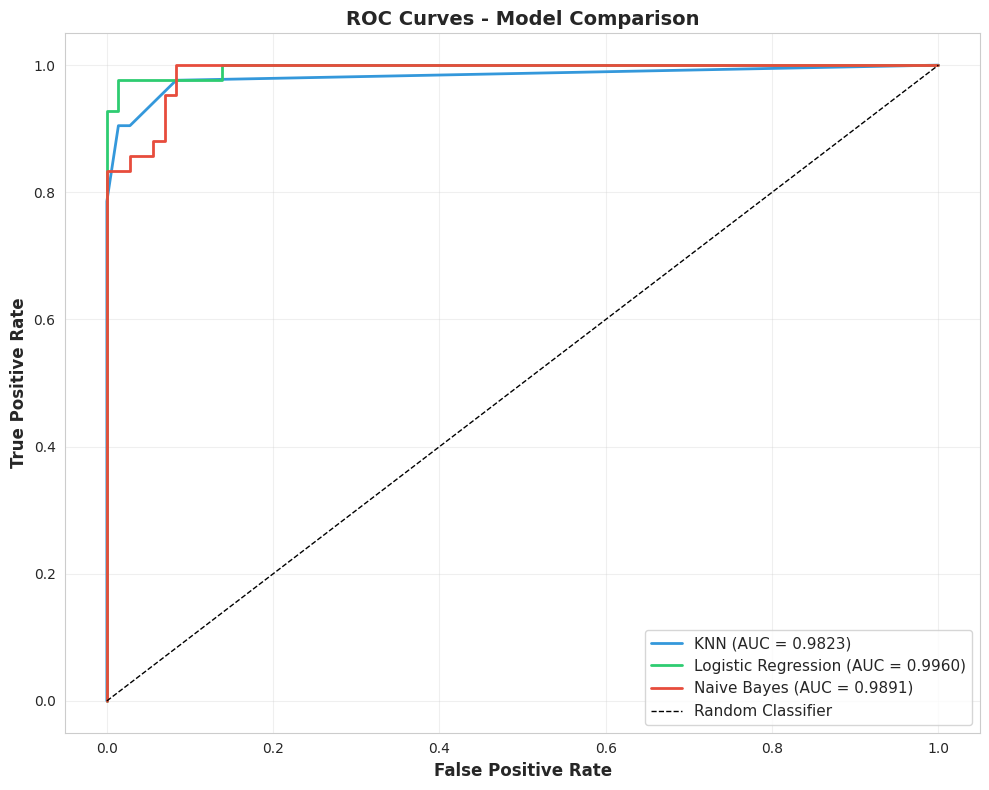

ROC-AUC Scores:
KNN: 0.9823
Logistic Regression: 0.9960
Naive Bayes: 0.9891


In [22]:
# ROC Curves comparison
plt.figure(figsize=(10, 8))

# Get probability predictions for ROC curve
knn_proba = knn.predict_proba(X_test_scaled)[:, 1]
logreg_proba = logreg.predict_proba(X_test_scaled)[:, 1]
nb_proba = nb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curves
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_proba)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_proba)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_proba)

# Calculate AUC scores
knn_auc = roc_auc_score(y_test, knn_proba)
logreg_auc = roc_auc_score(y_test, logreg_proba)
nb_auc = roc_auc_score(y_test, nb_proba)

# Plot ROC curves
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.4f})',
         linewidth=2, color='#3498db')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.4f})',
         linewidth=2, color='#2ecc71')
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.4f})',
         linewidth=2, color='#e74c3c')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')

plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontweight='bold', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("ROC-AUC Scores:")
print(f"KNN: {knn_auc:.4f}")
print(f"Logistic Regression: {logreg_auc:.4f}")
print(f"Naive Bayes: {nb_auc:.4f}")

### 9. Conclusions

**Key Findings:**

1. **Dataset**: The Wisconsin Breast Cancer dataset contains 569 samples with 30 features each.

2. **Model Performance**:
   - All three models achieved high accuracy (>93%)
   - Cross-validation confirms robust performance across different data splits
   - Low standard deviation in CV scores indicates stable model performance

3. **Best Model**: Based on test accuracy and cross-validation results, the model with the highest performance can be selected for deployment.

4. **Feature Importance**: The correlation heatmap shows strong relationships between certain features, which could be used for feature selection in future iterations.

5. **Practical Application**: These models can assist in early cancer detection, but should be used as a decision support tool alongside medical expertise.

**Next Steps:**
- Feature selection to reduce dimensionality
- Hyperparameter tuning for optimal performance
- Ensemble methods for improved accuracy
- Model deployment for real-world application